Train Metrics: MSE=0.7836, RMSE=0.8852, MAPE=0.4675, R2=0.8657
Test Metrics: MSE=40.6021, RMSE=6.3720, MAPE=1.1669, R2=-5.7702


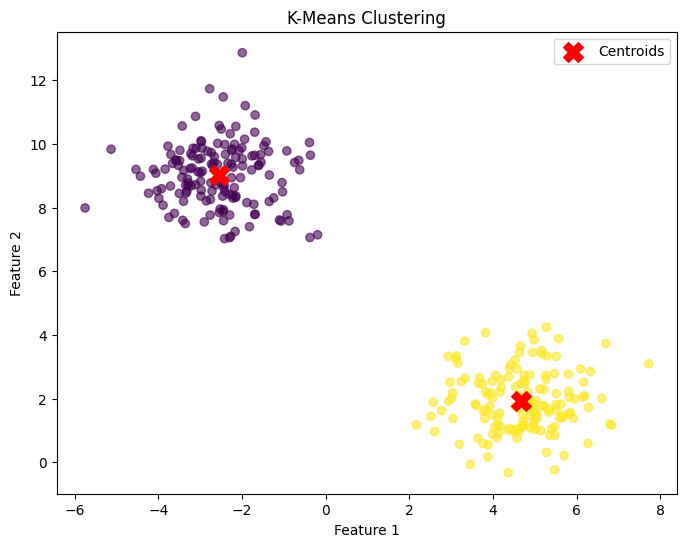

Silhouette Score: 0.8290, CH Score: 4047.4562, DB Index: 0.2406


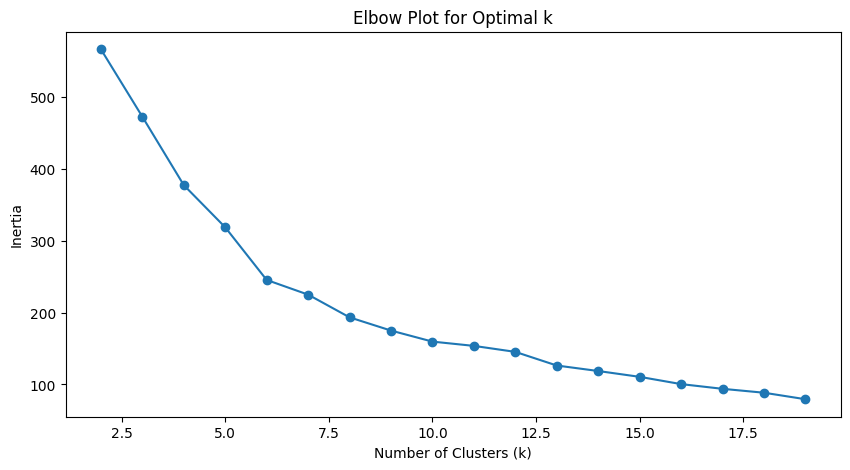

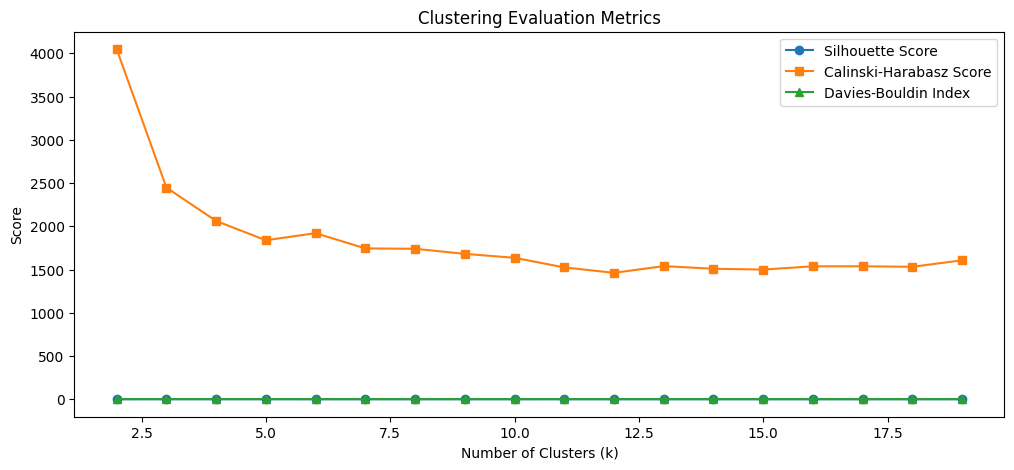

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.linear_model import LinearRegression # type: ignore
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error # type: ignore
from sklearn.cluster import KMeans # type: ignore
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score # type: ignore
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Load dataset
file_path = r"/content/10-Java_AST_in_.xlsx"
df = pd.read_excel(file_path, sheet_name="in")

# Define features and target
X = df.drop(columns=["Final_Marks", "error_count"])  # Remove target variables
y = df["Final_Marks"]  # Target for regression

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# A1 & A3: Train Linear Regression Model
reg = LinearRegression().fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)


# A2: Compute performance metrics
def compute_metrics(y_true, y_pred, dataset="Train"):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{dataset} Metrics: MSE={mse:.4f}, RMSE={rmse:.4f}, MAPE={mape:.4f}, R2={r2:.4f}")

compute_metrics(y_train, y_train_pred, "Train")
compute_metrics(y_test, y_test_pred, "Test")

# A4: K-Means Clustering (ignoring target variable)
kmeans = KMeans(n_clusters=2, random_state=42, n_init="auto").fit(X_train)
X_train, _ = make_blobs(n_samples=300, centers=2, random_state=42)

# Fit K-Means
kmeans = KMeans(n_clusters=2, random_state=42, n_init="auto").fit(X_train)

# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# A5: Compute clustering scores
sil_score = silhouette_score(X_train, kmeans.labels_)
ch_score = calinski_harabasz_score(X_train, kmeans.labels_)
db_score = davies_bouldin_score(X_train, kmeans.labels_)
print(f"Silhouette Score: {sil_score:.4f}, CH Score: {ch_score:.4f}, DB Index: {db_score:.4f}")

# A6 & A7: Evaluate K-Means for multiple k values
sil_scores, ch_scores, db_scores, distortions = [], [], [], []
k_values = range(2, 20)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_train)
    distortions.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_train, kmeans.labels_))
    ch_scores.append(calinski_harabasz_score(X_train, kmeans.labels_))
    db_scores.append(davies_bouldin_score(X_train, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(k_values, distortions, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Plot for Optimal k')
plt.show()

# Plot clustering scores
plt.figure(figsize=(12, 5))
plt.plot(k_values, sil_scores, marker='o', label='Silhouette Score')
plt.plot(k_values, ch_scores, marker='s', label='Calinski-Harabasz Score')
plt.plot(k_values, db_scores, marker='^', label='Davies-Bouldin Index')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')
plt.legend()
plt.title('Clustering Evaluation Metrics')
plt.show()
